## Preprocessing

In [1]:
#pip install tensorflow

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Find null values
for column in application_df:
    print(f"Column {column} has {application_df[column].isnull().sum()} null values")

Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [5]:
len(application_df)

34299

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
list(application_counts[application_counts < 500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
application_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
application_num_df = pd.get_dummies(application_df)
application_num_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
target = application_num_df["IS_SUCCESSFUL"]
data = application_num_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
X_train.head(5)

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
10491,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9384,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11614,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17386,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3844,1,5000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
number_input_features = len(X_train.columns)
number_input_features

43

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Create a callback that saves the model's weights every five epochs
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoints variables
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path= 'checkpoints/weights.{epoch}.hdf5'

# Create callback 
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq='epoch',
                              period=5)



In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5386 - accuracy: 0.7383
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7377
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5377 - accuracy: 0.7378
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7371
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.5379 - accuracy: 0.7380
Epoch 5: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7379
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7385
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7380
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5379 - accuracy: 0.7386
Epoch 9/100
804/804 [==============================] - 

782/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7414
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7408
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7392
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7401
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7403
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7396
Epoch 70/100
788/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7412
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7408
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.7409
Epoch 72/100
804/804 

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5681 - accuracy: 0.7307 - 552ms/epoch - 2ms/step
Loss: 0.5680810809135437, Accuracy: 0.7307288646697998


<AxesSubplot:>

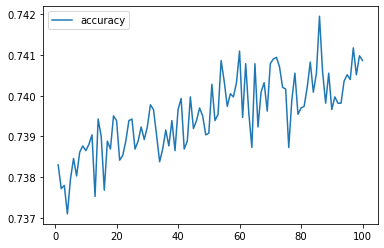

In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

<AxesSubplot:>

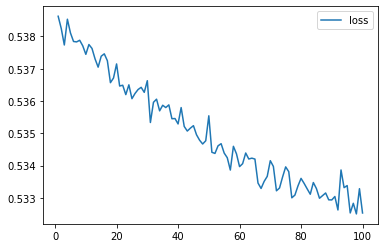

In [33]:
# Plot the loss
history_df.plot(y='loss')

In [31]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity.h5')

Since the loss is .55, the model could be further improved. Accuracy shows that 73% of the model's predicted value matches with the original dataset. 

## Optimize the Model

In [43]:
X_train_scaled.shape

(25724, 43)

In [44]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
               
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [45]:
# Import the kerastuner library
import keras_tuner as kt

# Create a `Hyperband()` tuner instance
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=30,
    hyperband_iterations=3)


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [46]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=30,validation_data=(X_test_scaled,y_test))

Trial 270 Complete [00h 00m 53s]
val_accuracy: 0.7322449088096619

Best val_accuracy So Far: 0.7338775396347046
Total elapsed time: 00h 57m 13s
INFO:tensorflow:Oracle triggered exit


In [47]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)  # prints the dictionary of parameters

{'activation': 'relu', 'first_units': 11, 'num_layers': 3, 'units_0': 26, 'units_1': 11, 'units_2': 26, 'units_3': 6, 'units_4': 16, 'tuner/epochs': 30, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 16, 'num_layers': 2, 'units_0': 16, 'units_1': 21, 'units_2': 1, 'units_3': 21, 'units_4': 26, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 11, 'num_layers': 1, 'units_0': 26, 'units_1': 26, 'units_2': 26, 'units_3': 1, 'units_4': 16, 'tuner/epochs': 30, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [48]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print('---------------------------------')

268/268 - 1s - loss: 0.5527 - accuracy: 0.7339 - 548ms/epoch - 2ms/step
Loss: 0.5527310967445374, Accuracy: 0.7338775396347046
---------------------------------
268/268 - 1s - loss: 0.5528 - accuracy: 0.7335 - 529ms/epoch - 2ms/step
Loss: 0.5528243780136108, Accuracy: 0.7335277199745178
---------------------------------
268/268 - 1s - loss: 0.5556 - accuracy: 0.7334 - 563ms/epoch - 2ms/step
Loss: 0.555608868598938, Accuracy: 0.7334110736846924
---------------------------------
